<a href="https://colab.research.google.com/github/kb10241024/CLASSIFIER_MODELS/blob/master/000Multiclass_Classification/Rock-Paper-Scissor/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-12-06 14:13:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  69.1MB/s    in 2.8s    

2019-12-06 14:13:57 (69.1 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-12-06 14:14:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 2a00:1450:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock02-052.png', 'rock05ck01-067.png', 'rock04-092.png', 'rock03-107.png', 'rock04-065.png', 'rock06ck02-084.png', 'rock02-018.png', 'rock01-099.png', 'rock06ck02-066.png', 'rock01-065.png']
['paper05-067.png', 'paper02-023.png', 'paper07-004.png', 'paper04-084.png', 'paper05-109.png', 'paper06-112.png', 'paper07-090.png', 'paper07-084.png', 'paper04-072.png', 'paper01-036.png']
['scissors01-119.png', 'scissors02-080.png', 'scissors04-056.png', 'scissors04-061.png', 'scissors03-001.png', 'scissors01-068.png', 'scissors03-022.png', 'scissors03-000.png', 'testscissors01-084.png', 'scissors03-026.png']


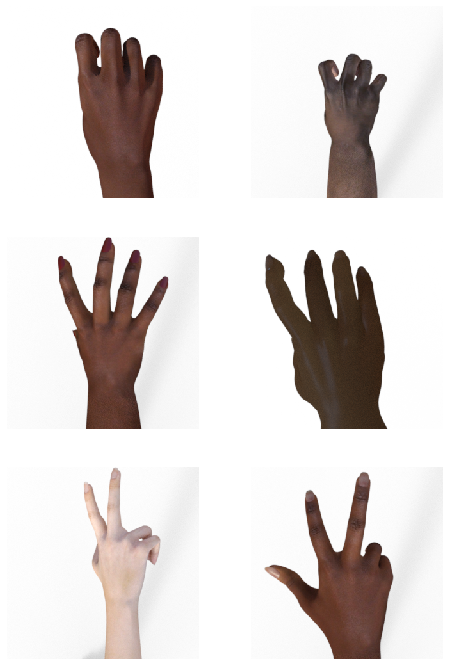

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 2x3 configuration
nrows = 3
ncols = 2

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 2x3 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 2
next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# for i, img_path in enumerate(next_rock+next_paper+next_scissors):
#   #print(img_path)
#   img = mpimg.imread(img_path)
#   plt.imshow(img)
#   plt.axis('Off')
#   plt.show()

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPool

In [7]:
history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Epoch 1/25
79/79 [==============================] - 30s 381ms/step - loss: 1.1657 - acc: 0.3615 - val_loss: 1.0029 - val_acc: 0.4005
Epoch 2/25
79/79 [==============================] - 25s 316ms/step - loss: 0.8768 - acc: 0.5710 - val_loss: 0.3663 - val_acc: 0.9409
Epoch 3/25
79/79 [==============================] - 26s 333ms/step - loss: 0.5890 - acc: 0.7468 - val_loss: 0.1115 - val_acc: 0.9892
Epoch 4/25
79/79 [==============================] - 25s 315ms/step - loss: 0.3717 - acc: 0.8468 - val_loss: 0.0849 - val_acc: 0.9677
Epoch 5/25
79/79 [==============================] - 26s 325ms/step - loss: 0.3087 - acc: 0.8806 - val_loss: 0.1804 - val_acc: 0.9839
Epoch 6/25
79/79 [==============================] - 26s 328ms/step - loss: 0.2038 - acc: 0.9234 - val_loss: 0.0866 - val_acc: 0.9677
Epoch 7/25
79/79 [==============================] - 26s 326ms/step - loss: 0.2029 - acc: 0.9262 - val_loss: 0.0763 - val_acc: 0.9731
Epoch 8/25
79/79 [==============================] - 26s 329ms/step - 

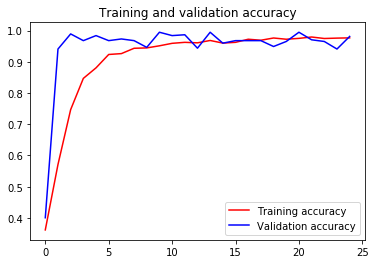

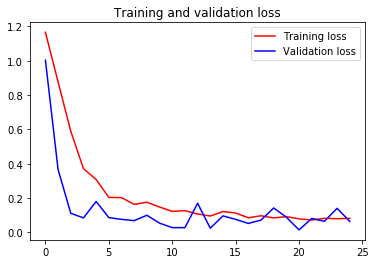

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
# plt.show()

plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

Saving Screenshot from 2019-12-06 21-02-26.png to Screenshot from 2019-12-06 21-02-26.png


In [32]:
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  if(classes[0][0]==1.):
    print("Paper")
  if(classes[0][1]==1.):
    print("Rock")
  else:
    print("Scissor")

Screenshot from 2019-12-06 21-02-26.png
[[0. 1. 0.]]
Rock
